## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/improve-your-analytics-projects-w-these-data-distributions-visualizations-7ba3821f2092), [notebook](https://github.com/kevinclee26/credit_card_churn)) <font size='3ptx'>**With Sample Code for Enhancements to Inspire Your Charting Creativity**</font>

Understanding how the variables are distributed in the data is an important step and should happen early in the **Exploratory Data Analysis** (<font color='brown'>EDA</font>) **process**. There are a number of tools available to analyze the distribution of data. **<font color='darkblue'>Visualization aids</font>** are likely the most popular because a well constructed chart can quickly answer important questions regarding the data. For example:
* What are the **central tendencies**? mean, median, and mode(s).
* What are the **dispersion measures**? range, IQR, variance, and standard deviation.
* What are the **shapes of the distributions**? uniform, parametric, symmetric, or skewed?
* Are there **outliers or extreme values**?

**In this article, we’ll look at the most popular charts used to express data distributions.*** We’re primarily focused on univariate data but will have the opportunity to perform comparisons across subsets based on a second variable.

## <font color='darkblue'>Introducing the Data Set</font>
**The data set comes from an analysis on attrition for a [credit card issuer](https://www.kaggle.com/sakshigoyal7/credit-card-customers) consisting of both demographic and financial data**. There are both categorical and numerical values that are discrete or continuous. A discrete variable is one that can only take certain values where as a continuous variable can take on an uncountable set of values. A discrete variable is one whose value is obtained by counting and a continuous variable is obtained by measuring. There are ~10,000 rows, where one row represent one customer.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
file_path= '../../datas/kaggle_credit_card_customers/BankChurners.csv'
df = pd.read_csv(file_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
drop_columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df['Total_Relationship_Cnt']=df['Total_Relationship_Count'].map(lambda x: 'More than 3' if x>3 else ('3' if x==3 else '2 or less'))
# df['Monthly_Trans_Ct']=df.apply(lambda x: x['Total_Trans_Ct']/12 if x['Months_on_book']>=12 else x['Total_Trans_Ct']/x['Months_on_book'], axis=1)#.round()
df['Total_Ct_Chng_Q4_Q1_bin']=pd.cut(df['Total_Ct_Chng_Q4_Q1'], bins=10)
income_map={
    'Unknown': '6. Unknown', 
    'Less than $40K': '5. Less than $40K', 
    '$40K - $60K': '4. $40K - $60K',
    '$60K - $80K': '3. $60K - $80K', 
    '$80K - $120K': '2. $80K - $120K',
    '$120K +': '1. $120K +'}
df['Income_Category']=df['Income_Category'].map(income_map)
df['Customer_Age_bin']=pd.cut(df['Customer_Age'], bins=[df['Customer_Age'].min() + i*6 for i in range(9)], include_lowest=True)
df['Months_on_book_bin']=pd.cut(df['Months_on_book'], bins=10)
df=df.drop(drop_columns, axis=1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Cnt,Total_Ct_Chng_Q4_Q1_bin,Customer_Age_bin,Months_on_book_bin
0,768805383,Existing Customer,45,M,3,High School,Married,3. $60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,More than 3,"(1.486, 1.857]","(44.0, 50.0]","(38.8, 43.1]"
1,818770008,Existing Customer,49,F,5,Graduate,Single,5. Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,More than 3,"(3.343, 3.714]","(44.0, 50.0]","(43.1, 47.4]"
2,713982108,Existing Customer,51,M,3,Graduate,Married,2. $80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,More than 3,"(2.228, 2.6]","(50.0, 56.0]","(34.5, 38.8]"
3,769911858,Existing Customer,40,F,4,High School,Unknown,5. Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,3,"(2.228, 2.6]","(38.0, 44.0]","(30.2, 34.5]"
4,709106358,Existing Customer,40,M,3,Uneducated,Married,3. $60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,More than 3,"(2.228, 2.6]","(38.0, 44.0]","(17.3, 21.6]"


**The primary goal of this article will be analyzing how the data is distributed, i.e. looking at counts of records across different categories.** The syntax being demonstrated assumes no prior transformation has been performed and each row represents one unique client. For basic plotting included in the article we will use the [**Pandas.DataFrame.plot()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method while for the more advanced plotting we will use a combination of [**Numpy**](https://numpy.org/) and [**Matplotlib.Pyplot**](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html) to allow for more customization.

## <font color='darkblue'>Frequency Table and Contingency Table</font>
Much of the data exploration begins with <font color='darkblue'>**Frequency Tables**</font>. **A Frequency Table shows the number of records associated with each category for univariate data. A <font color='darkblue'>Contingency Table</font> is the bivariate version of the frequency distribution table. It shows at a quick glance the high-level relationship between multiple variables**.

In [4]:
df['Customer_Age_bin'].value_counts()

(44.0, 50.0]      2874
(38.0, 44.0]      2472
(50.0, 56.0]      2009
(32.0, 38.0]      1241
(56.0, 62.0]       850
(25.999, 32.0]     462
(62.0, 68.0]       217
(68.0, 74.0]         2
Name: Customer_Age_bin, dtype: int64

In [5]:
df.pivot_table(columns='Education_Level', 
               index='Customer_Age_bin', 
               aggfunc='size')

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Customer_Age_bin,,,,,,,
"(25.999, 32.0]",53,1,138,96,41,58,75
"(32.0, 38.0]",130,57,382,265,59,185,163
"(38.0, 44.0]",251,98,784,481,118,366,374
"(44.0, 50.0]",268,152,866,540,161,433,454
"(50.0, 56.0]",224,93,628,402,91,278,293
"(56.0, 62.0]",67,39,256,181,44,140,123
"(62.0, 68.0]",20,11,74,46,2,27,37
"(68.0, 74.0]",0,0,0,2,0,0,0


We begin by examining if our data set is well represented across the demographic groups. This will give us a sense of whether or not there is [**sampling bias**](https://en.wikipedia.org/wiki/Sampling_bias#:~:text=In%20statistics%2C%20sampling%20bias%20is,higher%20sampling%20probability%20than%20others.) in the data. The Frequency Table shows that of the out of the 10K customers, majority of the customers are aged between 40 and 55. Looking further into the Contingency Table of Education Level, majority of the demographic groups have representation, although there are less customers with college level education than I expected.

In [6]:
def contingency_table(data, outer_col, inner_col, use_raw_data=False): 
    # Returns a contingency table based on two columns
    # data is a Pandas.DataFrame
    # outer_col and inner_col are Strings
    if not use_raw_data:
        return data[[outer_col, inner_col]].pivot_table(columns=outer_col, index=inner_col, aggfunc='size') \
                                       .fillna(0) \
                                       .apply(lambda x: x/x.sum(), axis=0) \
                                       .applymap(lambda x: '{:,.2f}%'.format(x*100))
    else:
        return data.pivot_table(
            columns=outer_col, 
            index=inner_col, 
            aggfunc='size'
        )

In [7]:
contingency_table(df, 'Education_Level', 'Customer_Age_bin')

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Customer_Age_bin,,,,,,,
"(25.999, 32.0]",5.23%,0.22%,4.41%,4.77%,7.95%,3.90%,4.94%
"(32.0, 38.0]",12.83%,12.64%,12.21%,13.16%,11.43%,12.44%,10.73%
"(38.0, 44.0]",24.78%,21.73%,25.06%,23.89%,22.87%,24.61%,24.62%
"(44.0, 50.0]",26.46%,33.70%,27.69%,26.83%,31.20%,29.12%,29.89%
"(50.0, 56.0]",22.11%,20.62%,20.08%,19.97%,17.64%,18.70%,19.29%
"(56.0, 62.0]",6.61%,8.65%,8.18%,8.99%,8.53%,9.41%,8.10%
"(62.0, 68.0]",1.97%,2.44%,2.37%,2.29%,0.39%,1.82%,2.44%
"(68.0, 74.0]",0.00%,0.00%,0.00%,0.10%,0.00%,0.00%,0.00%


With a general understanding of how Frequency Tables work, we can explore the various visualizations that express them.

## <font color='darkblue'>Heat Maps</font>
**A Heat Map can make Contingency Tables with many categories much easier to interpret.** It emphasize on the use of color to express the magnitude of each summary statistic. The result is a very intuitive and easy to read representation of the relative frequency.

In [8]:
df[['Customer_Age_bin', 'Gender']].pivot_table(index='Customer_Age_bin', columns='Gender', aggfunc='size') \
                                  .style.background_gradient()

Gender,F,M
Customer_Age_bin,,
"(25.999, 32.0]",216,246
"(32.0, 38.0]",653,588
"(38.0, 44.0]",1307,1165
"(44.0, 50.0]",1523,1351
"(50.0, 56.0]",1092,917
"(56.0, 62.0]",457,393
"(62.0, 68.0]",110,107
"(68.0, 74.0]",0,2


In [9]:
education_map=[
    'Unknown', 
    'Uneducated',
    'High School', 
    'College', 
    'Graduate', 
    'Post-Graduate', 
    'Doctorate']

df[['Customer_Age_bin', 'Education_Level']].pivot_table(
    index='Customer_Age_bin',
    columns='Education_Level',
    aggfunc='size')[education_map].iloc[:, 1:].style.background_gradient()

Education_Level,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Customer_Age_bin,,,,,,
"(25.999, 32.0]",58,96,53,138,41,1
"(32.0, 38.0]",185,265,130,382,59,57
"(38.0, 44.0]",366,481,251,784,118,98
"(44.0, 50.0]",433,540,268,866,161,152
"(50.0, 56.0]",278,402,224,628,91,93
"(56.0, 62.0]",140,181,67,256,44,39
"(62.0, 68.0]",27,46,20,74,2,11
"(68.0, 74.0]",0,2,0,0,0,0


In [10]:
pd.DataFrame(df['Customer_Age_bin'].value_counts().sort_index())

,Customer_Age_bin
"(25.999, 32.0]",462
"(32.0, 38.0]",1241
"(38.0, 44.0]",2472
"(44.0, 50.0]",2874
"(50.0, 56.0]",2009
"(56.0, 62.0]",850
"(62.0, 68.0]",217
"(68.0, 74.0]",2


In [11]:
income_cols={x: x.split()[-1] for x in sorted(income_map.values())}
(df[['Customer_Age_bin', 'Income_Category']].pivot_table(index='Customer_Age_bin', columns='Income_Category', aggfunc='size').rename(columns=income_cols))# .applymap(lambda x: '{:,.2f}%'.format(x*100)).style.background_gradient()

Income_Category,+,$120K,$80K,$60K,$40K,Unknown
Customer_Age_bin,,,,,,
"(25.999, 32.0]",9,25,50,94,211,73
"(32.0, 38.0]",75,191,177,232,432,134
"(38.0, 44.0]",150,391,387,450,854,240
"(44.0, 50.0]",204,459,423,502,957,329
"(50.0, 56.0]",235,362,233,285,688,206
"(56.0, 62.0]",54,102,117,177,307,93
"(62.0, 68.0]",0,5,15,49,111,37
"(68.0, 74.0]",0,0,0,1,1,0


In [12]:
contingency_table(df, 'Attrition_Flag', 'Income_Category')

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
1. $120K +,7.74%,7.07%
2. $80K - $120K,14.87%,15.21%
3. $60K - $80K,11.62%,14.27%
4. $40K - $60K,16.66%,17.87%
5. Less than $40K,37.62%,34.69%
6. Unknown,11.49%,10.88%


In [13]:
contingency_table(df, 'Attrition_Flag', 'Income_Category', use_raw_data=True).style.background_gradient()

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
1. $120K +,126,601
2. $80K - $120K,242,1293
3. $60K - $80K,189,1213
4. $40K - $60K,271,1519
5. Less than $40K,612,2949
6. Unknown,187,925


In [14]:
heat_map = contingency_table(df, 'Income_Category', 'Customer_Age_bin')
heat_map.style.background_gradient()

Income_Category,1. $120K +,2. $80K - $120K,3. $60K - $80K,4. $40K - $60K,5. Less than $40K,6. Unknown
Customer_Age_bin,,,,,,
"(25.999, 32.0]",1.24%,1.63%,3.57%,5.25%,5.93%,6.56%
"(32.0, 38.0]",10.32%,12.44%,12.62%,12.96%,12.13%,12.05%
"(38.0, 44.0]",20.63%,25.47%,27.60%,25.14%,23.98%,21.58%
"(44.0, 50.0]",28.06%,29.90%,30.17%,28.04%,26.87%,29.59%
"(50.0, 56.0]",32.32%,23.58%,16.62%,15.92%,19.32%,18.53%
"(56.0, 62.0]",7.43%,6.64%,8.35%,9.89%,8.62%,8.36%
"(62.0, 68.0]",0.00%,0.33%,1.07%,2.74%,3.12%,3.33%
"(68.0, 74.0]",0.00%,0.00%,0.00%,0.06%,0.03%,0.00%


The syntax of a Heat Map in Pandas requires styling the DataFrame. The `style.background_gradient()` method can take other colormaps ([cmap](https://matplotlib.org/tutorials/colors/colormaps.html)) based on preference.
```python
df[['Customer_Age']].style.background_gradient()
```

The Heat Maps shows that while **there is notably less Attrited Customer in the data, the distribution of their demographic characteristics appear to be similar to those of Existing Customer**. This could suggest that 1) there isn’t a strong associate with income and the decision to churn or 2) the data was intentionally sampled to maintain a ratio in each category for the two groups. We can proceed to examine the other features across the two groups.

## <font color='darkblue'>Pie Charts</font>
Perhaps the simplest chart to visualizing a distribution is the [**Pie Chart**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html). Pie Charts are simple and effortless to read. **It is effective in demonstrating fractional relationships across categories.**

The syntax for a Pie Chart in Pandas requires the data to be transformed from the raw data into counts of unique values:

<AxesSubplot:ylabel='Attrition_Flag'>

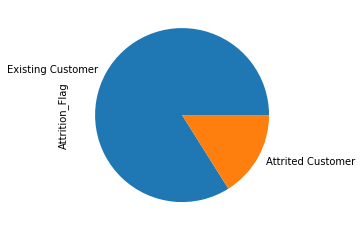

In [15]:
# Need to transform raw data into counts of unique values - the number of rows in the series that is calling the .plot() method will represent the number of slices
df['Attrition_Flag'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Total_Relationship_Cnt'>

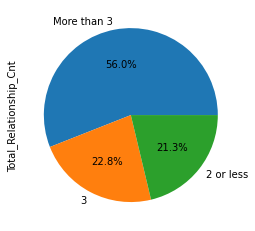

In [16]:
df['Total_Relationship_Cnt'].value_counts().plot(kind='pie', autopct='%1.1f%%')

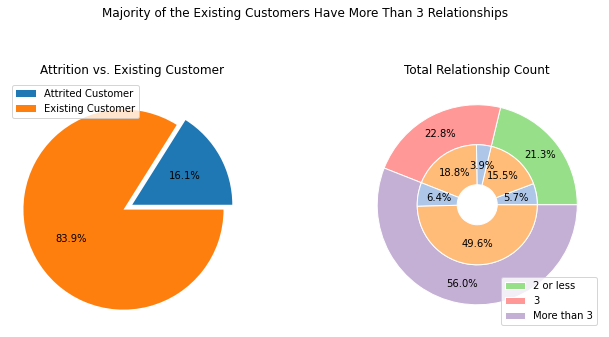

In [17]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
size=.4
cmap = plt.get_cmap("tab20")

vals = df.pivot_table(
    columns='Total_Relationship_Cnt',
    index='Attrition_Flag',
    aggfunc='size'
)#.to_numpy()
outer_colors = cmap(np.arange(2)*2)
outer_labels=vals.index
ax[0].pie(vals.sum(axis=1), radius=1, colors=outer_colors, autopct='%1.1f%%', explode=[0, 0.1])
ax[0].legend(outer_labels, loc='upper left')
ax[0].set_title('Attrition vs. Existing Customer')

vals = df.pivot_table(
    columns='Attrition_Flag', 
    index='Total_Relationship_Cnt', 
    aggfunc='size'
)#.to_numpy()
outer_colors = cmap(np.array([5, 7, 9]))
inner_colors = cmap(np.array([1, 3, 1, 3, 1, 3]))
outer_labels=vals.index

handles, texts, annots = ax[1].pie(
    vals.sum(axis=1),
    radius=1,
    colors=outer_colors, 
    wedgeprops=dict(width=size, edgecolor='w'),
    autopct='%1.1f%%', 
    pctdistance=0.8
)
ax[1].pie(vals.values.flatten(), radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=.65)
ax[1].set_title('Total Relationship Count')
ax[1].legend(handles, outer_labels, loc='lower right')
fig.suptitle('Majority of the Existing Customers Have More Than 3 Relationships')
plt.tight_layout(pad=3)
plt.show()

This Pie Chart of the Customer Attrition Indicator represents the portion of the data set associated with Attrited Customer vs. Existing Customer. The above visualization shows that there is a 16.1% attrition rate — indeed a big issue for the company. Looking into it further with a Nested Pie Chart of the Total Relationship Count reveals that majority of the existing clients (<font color='brown'>49.6% of 83.9%</font>) have more than 3 relationships with the financial institution. **Comparing that to a much smaller portion of the attrited customers** (<font color='brown'>6.4% of 16.1%</font>) **suggests that customers that have more relationships with the financial institution are less likely to churn**.

In [18]:
def plot_nested_pie(data, outer_col, inner_col):
    # Plots a nested pie of counts of observations 
    # based on two categorical columns
    # data is a Pandas.DataFrame
    # outer_col and inner_col are Strings
    size=.4
    wedgeprops={'width': size, 'edgecolor':'w'}
    plot_df=df.pivot_table(columns=inner_col, 
                           index=outer_col, 
                           aggfunc='size')
    plt.pie(plot_df.sum(axis=1), 
            radius=1,
            wedgeprops=wedgeprops, 
            autopct='%1.1f%%', 
            pctdistance=0.8)
    plt.pie(plot_df.values.flatten(), 
            radius=1-size,
            wedgeprops=wedgeprops, 
            autopct='%1.1f%%', 
            pctdistance=.65)
    labels=list(plot_df.index)+[(idx, col) for idx in plot_df.index for col in plot_df.columns]
    plt.legend(labels, bbox_to_anchor=(1, 1))
    plt.title(outer_col)

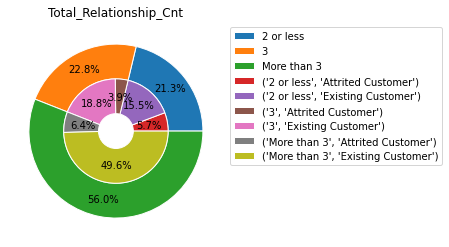

In [19]:
plot_nested_pie(df, 'Total_Relationship_Cnt', 'Attrition_Flag')

## <font color='darkblue'>Bar Graphs</font>
**Pie Charts lose their effectiveness when there are too many narrow slices because it can become too busy**. An alternative visualization when there are many categories is a frequency [**Bar Chart**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html). This type of Bar Chart graphs a bar for each selected category with the height of each bar indicating the frequency of that category.

The syntax for the Frequency Bar Chart in Pandas again requires the data to be transformed from the raw data into counts of unique values:

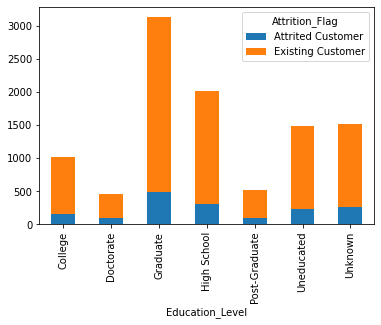

In [20]:
education_level = df[['Attrition_Flag', 'Education_Level']] \
    .groupby(['Education_Level', 'Attrition_Flag']) \
    .size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Contacts_Count_12_mon'>

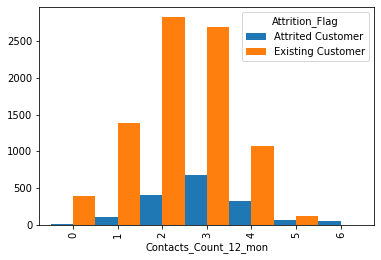

In [21]:
df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(
    columns='Attrition_Flag', 
    index='Contacts_Count_12_mon',
    aggfunc='size').plot(kind='bar', width=1)

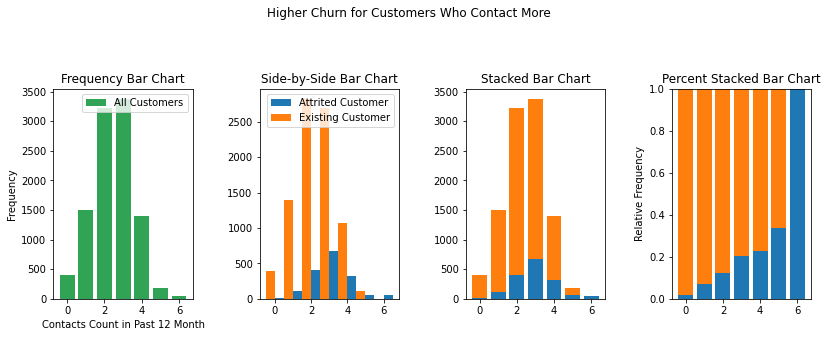

In [22]:
fig, ax=plt.subplots(1, 4, figsize=(12, 5))
cmap = plt.get_cmap("tab20c")

data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(
    columns='Attrition_Flag',
    index='Contacts_Count_12_mon',
    aggfunc='size'
)
ax[0].bar(data.index, data.sum(axis=1), color=cmap(8), label='All Customers')
ax[0].set_title('Frequency Bar Chart')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Contacts Count in Past 12 Month')
ax[0].legend()
data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
width=.5
for idx, each_cat in enumerate(data.columns): 
    ax[1].bar(data.index-(idx*width), data[each_cat].values, width=width, label=each_cat, align='edge')
ax[1].set_title('Side-by-Side Bar Chart')
ax[1].legend()
data=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size')
bottom=np.zeros(len(data.index))
for each_cat in data.columns: 
    ax[2].bar(data.index, data[each_cat].values, bottom=bottom, label=each_cat)
    bottom+=data[each_cat].values
ax[2].set_title('Stacked Bar Chart')
ary=df[['Attrition_Flag', 'Contacts_Count_12_mon']].pivot_table(columns='Attrition_Flag', index='Contacts_Count_12_mon', aggfunc='size').apply(lambda x: x/x.sum(), axis=1)
bottom=np.zeros(len(ary.index))
for each_cat in ary.columns: 
    ax[3].bar(ary.index, ary[each_cat].values, bottom=bottom, label=each_cat)
    bottom+=ary[each_cat].values
ax[3].set_ylabel('Relative Frequency')
ax[3].set_title('Percent Stacked Bar Chart')
fig.suptitle('Higher Churn for Customers Who Contact More')
plt.tight_layout(pad=3)
plt.show()

This Bar Chart of the Contacts Count in 12 Months expresses the count of customers who have contacted 0 to 6 times as different categories. The above visualization shows that majority of the customers contact 2 to 3 times in a 12-month period. We can look further into how this affects their decision to continue or stop using the service through stratification. The **Side-by-Side Bar Chart** and the **Stacked Bar Chart** don’t exactly tell the complete story. However, together with the **Percent Stacked Bar Chart** of the cross tabulation, they show that <font color='darkred'>**customers who contact more frequently are likely the churn. In addition, customers will likely terminate the relationship at their 6th and final contact**.</font>

In [23]:
def plot_stacked_bar_pct(data, outer_col, inner_col): 
    # Plots a percent stacked bar chart of counts of observations 
    # based on two categorical columns
    # data is a Pandas.DataFrame
    # outer_col and inner_col are Strings
    plot_df=data[[inner_col, outer_col]].pivot_table(columns=inner_col, 
                                                     index=outer_col, 
                                                     aggfunc='size').apply(lambda x: x/x.sum(), axis=1)
    bottom=np.zeros(len(plot_df.index))
    for each_cat in plot_df.columns: 
        plt.bar(plot_df.index, 
                plot_df[each_cat].values, 
                bottom=bottom, 
                label=each_cat)
        bottom+=plot_df[each_cat].values
    plt.legend()
    plt.xlabel(outer_col)
    plt.ylabel('Relative Frequency')

In [24]:
df[['Contacts_Count_12_mon', 'Attrition_Flag']].pivot_table(
    columns='Contacts_Count_12_mon', 
    index='Attrition_Flag', 
    aggfunc='size').apply(lambda x: x/x.sum(), axis=1)

Contacts_Count_12_mon,0,1,2,3,4,5,6
Attrition_Flag,,,,,,,
Attrited Customer,0.004302,0.066380,0.247695,0.418562,0.193608,0.036263,0.03319
Existing Customer,0.046118,0.163647,0.332235,0.317529,0.126706,0.013765,NaN


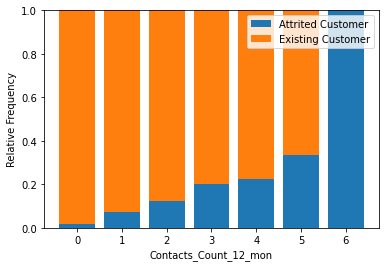

In [25]:
plot_stacked_bar_pct(df, 'Contacts_Count_12_mon', 'Attrition_Flag')

## <font color='darkblue'>Histograms</font>
We can use a Bar Chart to compare the frequency for categorical (<font color='brown'>or discrete</font>) variables. This is very similar to a **Histogram, which is also a graphical representation of tabulated frequencies. It is used to show distribution for discrete and continuous numerical variables**. In order to count the frequency of occurrences for continuous variables, they have to first be put into discrete intervals — a process called binning. **A Histogram has the x-axis representing the data divided evenly into a set of bins and the y-axis** (<font color='brown'>height of the bars</font>) **representing the count of observations for each bin. For a Histogram, the order of the bins on the x-axis is important and there are no gaps between the bins.**

The syntax for the Histogram in Pandas doesn’t require any transformation. While Matplotlib and Pandas will automatically choose a reasonable bin width, it can be advantageous to create custom bins — this can be easily done with Numpy.

In [26]:
def plot_overlap_hist(data, outer_col, inner_col, bin_width): 
    min_amt=data[outer_col].min()
    max_amt=data[outer_col].max()
    first_bin=min_amt//bin_width*bin_width
    bins=[first_bin+i*bin_width for i in range(math.ceil((max_amt-min_amt)/bin_width)+1)]
#     bins=np.arange(min_amt, max_amt, bin_width)
    for idx, (g_name, g) in enumerate(data.groupby(inner_col)): 
        plt.hist(g[outer_col].values, alpha=.5, label=g_name, bins=bins)
    plt.legend()
    plt.xlabel(outer_col)
    plt.ylabel('Frequency')

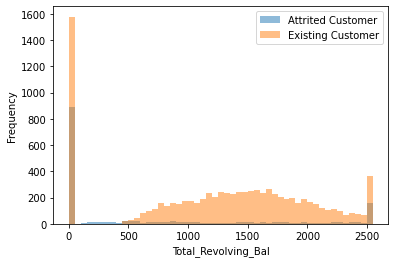

In [27]:
plot_overlap_hist(df, 'Total_Revolving_Bal', 'Attrition_Flag', 50)

<AxesSubplot:ylabel='Frequency'>

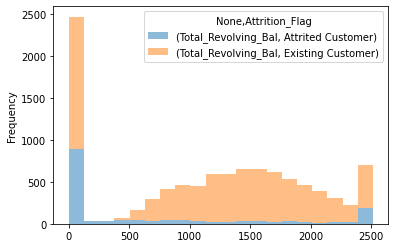

In [28]:
df[['Total_Revolving_Bal', 'Attrition_Flag']].pivot(
    columns='Attrition_Flag').plot(kind='hist', stacked=True, alpha=0.5, bins=20)

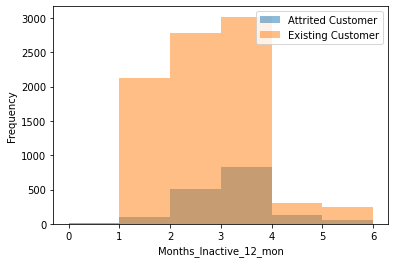

In [29]:
plot_overlap_hist(df, 'Months_Inactive_12_mon', 'Attrition_Flag', 1)

The Histogram of Revolving Balance reveals that there is a cluster of customers that maintain a `$0` balance and exactly `$2,517`, many of which churn. Filtering out those clients at the two extremes, the distribution exhibits symmetry around the mean of ~`$1500`, at least for the Existing Customers. They also generally maintain a balance above ~`$500`. This bell-shaped distribution is recognized for its **“normality“** that can be defined by its mean, standard deviation, and in this case kurtosis (<font color='brown'>a.k.a. “tailedness”</font>). Knowing these characteristics about this distribution can be quite useful. **The distribution for Attrited Customer appear to be much more uniform across the bins. This is an indication that the Revolving Balance may not be a good signal for attrition by itself.**

## <font color='darkblue'>Density Plots</font>
A useful statistical approach to looking at the Histogram is to express the counts as **relative frequency**, or percent of total. For discrete data and bin size of 1, this is the **density** of each option. For continuous variables, the relative frequency needs to be further divided by the size of the bin to arrive at the density for each bin. This can be interpreted as the **empirical probability** of a given value occurring in the bin. As result, the sum of the area of all bars equals to 100%. This is known as “**normalizing**” the Histogram. **In a <font color='darkblue'>Density Plot</font>, we attempt to visualize the underlying probability distribution of continuous variable by drawing a curve of the density at an infinitesimal bin width — this is known as the [Probability Density Function](https://en.wikipedia.org/wiki/Probability_density_function). An important aspect of this plot/function is that it “smooths” out the probability distribution through estimation.** The idea behind estimation is that we view our data as a subset of a much larger list that we’re interested in — the population. We can estimate this distribution by taking the weighted sum of all of the components, one component being a distribution centered around a recorded data point (<font color='brown'>based on the kernel chosen</font>). **When looking at the Density Plot, we can interpret the probability of a value falling within a certain range as the area under the curve**.

The syntax for the Density Plot is very similar to that of the Histogram:

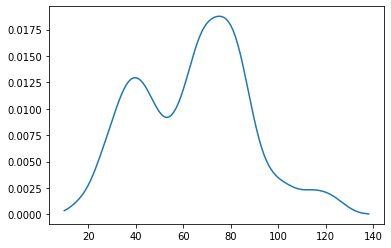

In [30]:
from scipy.stats import gaussian_kde

kde=gaussian_kde(df['Total_Trans_Ct'].values)
x_axis=np.arange(df['Total_Trans_Ct'].values.min(), df['Total_Trans_Ct'].values.max())
plt.plot(x_axis, kde(x_axis))

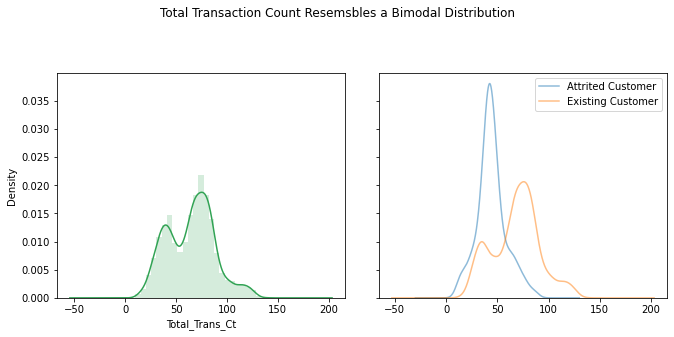

In [33]:
fig, ax=plt.subplots(1, 2, sharey=True, figsize=(10, 5))
df['Total_Trans_Ct'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[0])
df['Total_Trans_Ct'].plot(kind='kde', color=cmap(8), ax=ax[0])
ax[0].set_xlabel('Total_Trans_Ct')
fig.suptitle('Total Transaction Count Resemsbles a Bimodal Distribution')

total_rev_bal = df[(df['Total_Revolving_Bal']>0)&(df['Total_Revolving_Bal']<2517)]
total_rev_bal[['Total_Trans_Ct', 'Attrition_Flag']].pivot(
    columns='Attrition_Flag').plot(
        kind='kde', 
        alpha=.5,
        ax=ax[1]
    )

ax[1].legend(['Attrited Customer', 'Existing Customer'])
plt.tight_layout(pad=3)
plt.show()

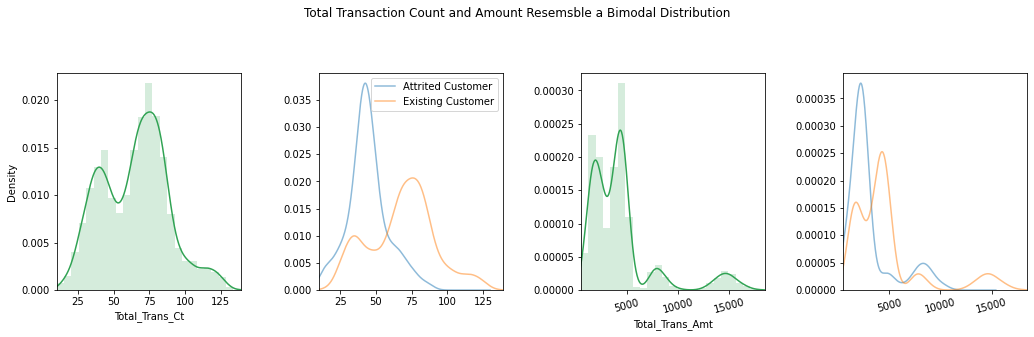

In [34]:
cmap=plt.get_cmap('tab20c')
fig, ax=plt.subplots(1, 4, figsize=(15, 5))
df['Total_Trans_Ct'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[0])
df['Total_Trans_Ct'].plot(kind='kde', color=cmap(8), ax=ax[0])
ax[0].set_xlabel('Total_Trans_Ct')
ax[0].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[0].set_ylim(bottom=0)

total_rev_bal[['Total_Trans_Ct', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='kde', alpha=.5, ax=ax[1])
ax[1].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[1].set_ylim(bottom=0)
ax[1].set_ylabel('')
ax[1].legend(['Attrited Customer', 'Existing Customer'])

df['Total_Trans_Amt'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[2], rot=15)
df['Total_Trans_Amt'].plot(kind='kde', color=cmap(8), ax=ax[2], rot=15)
ax[2].set_xlabel('Total_Trans_Amt')
ax[2].set_xlim([df['Total_Trans_Amt'].min(), df['Total_Trans_Amt'].max()])
ax[2].set_ylim(bottom=0)
ax[2].set_ylabel('')

total_rev_bal[['Total_Trans_Amt', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='kde', alpha=.5, ax=ax[3], rot=15)
ax[3].set_xlim([df['Total_Trans_Amt'].min(), df['Total_Trans_Amt'].max()])
ax[3].set_ylim(bottom=0)
ax[3].set_ylabel('')
ax[3].legend().remove()

fig.suptitle('Total Transaction Count and Amount Resemsble a Bimodal Distribution')
plt.tight_layout(pad=3)
plt.show()

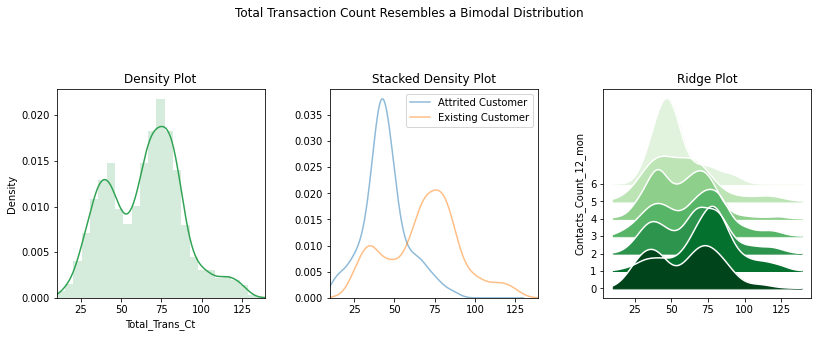

In [43]:
cmap = plt.get_cmap('tab20c')
zoom = 5
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
df['Total_Trans_Ct'].plot(kind='hist', color=cmap(8), alpha=0.2, density=True, bins=25, ax=ax[0])
df['Total_Trans_Ct'].plot(kind='kde', color=cmap(8), ax=ax[0])
ax[0].set_xlabel('Total_Trans_Ct')
ax[0].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[0].set_ylim(bottom=0)
ax[0].set_title('Density Plot')

total_rev_bal[['Total_Trans_Ct', 'Attrition_Flag']].pivot(columns='Attrition_Flag').plot(kind='kde', alpha=.5, ax=ax[1])
ax[1].set_xlim([df['Total_Trans_Ct'].min(), df['Total_Trans_Ct'].max()])
ax[1].set_ylim(bottom=0)
ax[1].set_ylabel('')
ax[1].set_title('Stacked Density Plot')
ax[1].legend(['Attrited Customer', 'Existing Customer'])

cmap = plt.get_cmap('Greens')
sorted_df = df.sort_values('Contacts_Count_12_mon', ascending=False)
categories = sorted_df['Contacts_Count_12_mon'].unique()
c_increment = 256/len(categories)
ticks = []
ridge_gap = 1.0/np.exp(zoom)
for idx, each_cat in enumerate(categories):
    values = sorted_df[sorted_df['Contacts_Count_12_mon']==each_cat]['Total_Trans_Ct'].values
    kde = gaussian_kde(values)
    x_axis = np.linspace(sorted_df['Total_Trans_Ct'].values.min(), sorted_df['Total_Trans_Ct'].values.max(), 100)
         # x_axis=np.arange(data[inner_col].values.min(), data[inner_col].values.max())
    y_upper = kde(x_axis)-ridge_gap*idx
    y_lower = -ridge_gap*idx
    ax[2].plot(x_axis, kde(x_axis)-ridge_gap*idx, color='w')
    ax[2].fill_between(x_axis, y_upper, y_lower, color=cmap(int((idx+1)*c_increment)))
    ticks.append(each_cat)
    
tick_loc=[-ridge_gap*i for i in range(len(categories))]
ax[2].set_yticks(tick_loc)
ax[2].set_yticklabels(ticks)
ax[2].set_ylabel('Contacts_Count_12_mon')
ax[2].set_title('Ridge Plot')

fig.suptitle('Total Transaction Count Resembles a Bimodal Distribution')
fig.tight_layout(pad=3)
plt.show()

**The Density Plot of Total Transaction Count reveals that the distribution have two modes at ~45 and ~75**. Coincidentally these are close to the modes of the individual Density Plots stratified by Attrition Flag. This is an indication that Total Transaction Count can be a good signal for attrition. **That is, customers that transacted more often are less likely to churn.**

Perhaps the intuition could be that customers who use their credit cards often may have automatic payments set up with their accounts, which disincentivizes them from leaving. **Knowing the association between high Contacts Count and churn, a Ridge Plot by Contacts Count in the Last 12 Months shows that customers might begin to phase out using their Credit Cards after each contact.**

In [44]:
def plot_ridge(data, outer_col, inner_col, zoom): 
    # Plots stratefied density plot of different category
    # data is a Pandas.DataFrame
    # outer_col and inner_col are Strings
    # zoom is a Float that determine how far apart the density plots are 
    from scipy.stats import gaussian_kde
    cmap=plt.get_cmap('Greens')
    categories=data[outer_col].unique()
    c_increment=256/len(categories)
    ticks=[]
    ridge_gap=1/np.exp(zoom)
    for idx, each_cat in enumerate(categories): 
        values=data[data[outer_col]==each_cat][inner_col].values
        if len(values)>1: 
            kde=gaussian_kde(values)
            x_axis=np.linspace(data[inner_col].values.min(), data[inner_col].values.max(), 100)
            # x_axis=np.arange(data[inner_col].values.min(), data[inner_col].values.max())
            y_upper=kde(x_axis)-ridge_gap*idx
            y_lower=-ridge_gap*idx
            plt.plot(x_axis, kde(x_axis)-ridge_gap*idx, color='w')
            plt.fill_between(x_axis, y_upper, y_lower, color=cmap(int((idx+1)*c_increment)))
        ticks.append(each_cat)
    tick_loc=[-ridge_gap*i for i in range(len(categories))]
    plt.yticks(tick_loc, ticks)
    plt.ylabel(outer_col)
    plt.xlabel(inner_col)

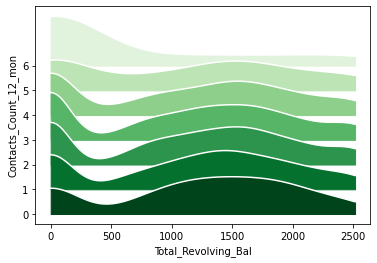

In [45]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 8)

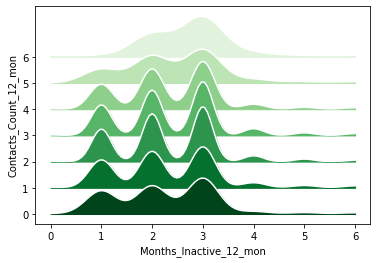

In [46]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 1)

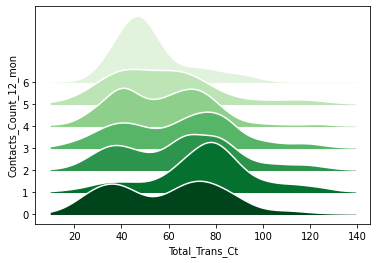

In [47]:
plot_ridge(df.sort_values(by='Contacts_Count_12_mon', ascending=False), 'Contacts_Count_12_mon', 'Total_Trans_Ct', 4.5)

## <font color='darkblue'>Box Plots</font>
**An alternative to the Histogram and Density Plot is the <font color='darkblue'>Box Plot</font>. Box and Whisker Plot, also known as Box Plot for short, is a common qualitative method to summarize the distribution of a data set through quartiles**. The box encloses the center half of the distribution between the lower and upper quartiles while the whiskers are used to indicate variability outside. Box Plots can also show the outliers as individual dots in-line with the whiskers. Although they may seem primitive, they have the advantage of being simple, which is useful when comparing different groups.

The syntax for Box Plot in Pandas doesn’t require any transformation. There are a number of cosmetic configuration that can be adjusted associated with the Box Plot: mean, median, outliers, whiskers, and box. ([see documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.boxplot.html)). **Importantly, I often opt to turn off outliers when using this chart with the <font color='violet'>showerfliers</font> parameter.**

<AxesSubplot:>

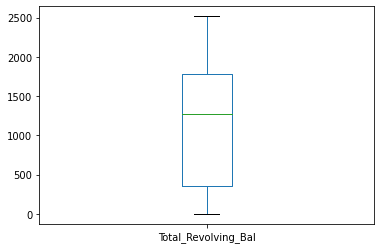

In [50]:
df['Total_Revolving_Bal'].plot(kind='box', showfliers=False)

<AxesSubplot:>

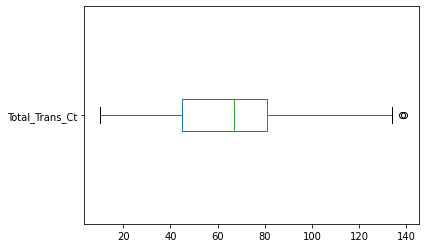

In [51]:
df['Total_Trans_Ct'].plot(kind='box', vert=False)

<AxesSubplot:>

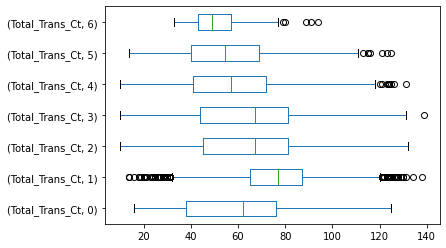

In [52]:
df[['Contacts_Count_12_mon', 'Total_Trans_Ct']]. \
    sort_values('Contacts_Count_12_mon'). \
    pivot(columns='Contacts_Count_12_mon'). \
    plot(kind='box', vert=False)

In [53]:
def rand_jitter(arr):
    stdev = .1 * (max(arr) - min(arr))
    print(stdev)
    return arr + np.random.randn(len(arr)) * 0.03# * stdev

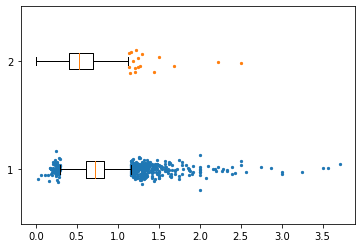

In [54]:
box_lists=[]
size=5
for idx, each_cat in enumerate(df['Attrition_Flag'].unique()): 
    value_list=df[df['Attrition_Flag']==each_cat]['Total_Ct_Chng_Q4_Q1'].values
    q3=np.quantile(value_list, 0.75)
    q1=np.quantile(value_list, 0.25)
    IQR=q3-q1
    outlier_x=[]
    outlier_y=[]
    for each_value in value_list: 
        if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
            outlier_x.append(each_value)
            outlier_y.append(idx+1)
    box_lists.append(value_list)
    jitter=outlier_y+np.random.randn(len(outlier_y))*size/100
    plt.scatter(outlier_x, jitter, s=size)
plt.boxplot(box_lists, showfliers=False, vert=False)
plt.show()

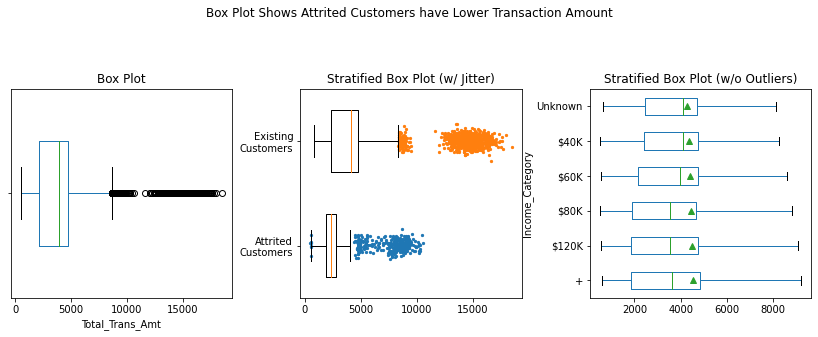

In [55]:
fig, ax=plt.subplots(1, 3, figsize=(12, 5))#, sharex=True)
df['Total_Trans_Amt'].plot(kind='box', vert=False, ax=ax[0], widths=.5)
ax[0].set_yticklabels('')
ax[0].set_xlabel('Total_Trans_Amt')
ax[0].set_title('Box Plot')

box_lists=[]
size=5
for idx, each_cat in enumerate(sorted(df['Attrition_Flag'].unique())): 
    value_list=df[df['Attrition_Flag']==each_cat]['Total_Trans_Amt'].values
    q3=np.quantile(value_list, 0.75)
    q1=np.quantile(value_list, 0.25)
    IQR=q3-q1
    outlier_x=[]
    outlier_y=[]
    for each_value in value_list: 
        if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
            outlier_x.append(each_value)
            outlier_y.append(idx+1)
    box_lists.append(value_list)
    jitter=outlier_y+np.random.randn(len(outlier_y))*size/100
    ax[1].scatter(outlier_x, jitter, s=size)
ax[1].boxplot(box_lists, showfliers=False, vert=False, widths=.6)
ax[1].set_yticklabels(['Attrited\nCustomers', 'Existing\nCustomers'])
ax[1].set_title('Stratified Box Plot (w/ Jitter)')

df[['Income_Category', 'Total_Trans_Amt']].sort_values('Income_Category', ascending=False).pivot(columns='Income_Category').plot(kind='box', vert=False, ax=ax[2], showmeans=True, showfliers=False)
ax[2].set_ylabel('Income_Category')
ax[2].set_yticklabels([x.split()[-1] for x in sorted(df['Income_Category'].unique())])
# ax[2].set_yticklabels([0, 1, 2, 3, 4, 5, 6])
ax[2].set_title('Stratified Box Plot (w/o Outliers)')
fig.suptitle('Box Plot Shows Attrited Customers have Lower Transaction Amount')
fig.tight_layout(pad=3, w_pad=0)

The Box Plot of Total Transaction Amount reveals a very similar story as the Total Transaction Count. That is, customer who churn tend to have spent less on their credit cards. Although the distribution is summarized in a much more simplified fashion. **We are able to clearly see that spending for Existing Customer is much more dispersed than Attrited Customer. Further, by applying a bit of jitter on the manually plotted outliers, we can see that there is a cluster of high spending Existing Customer.** These are going to be the customers that have a very low risk of churn. By stratifying the Box Plot based on Income Category, we can see that while there isn’t a notable pattern in the median spending over the income ladder, there is one in the mean.

In [56]:
def plot_box_jitter_outliers(data, outer_col, inner_col): 
    # Plots box plot with jittered outliers
    # data is a Pandas.DataFrame
    # outer_col and inner_col are Strings
    box_lists=[]
    categories=data[outer_col].unique()
    for idx, each_cat in enumerate(categories): 
        value_list=data[data[outer_col]==each_cat][inner_col].values
        q3=np.quantile(value_list, 0.75)
        q1=np.quantile(value_list, 0.25)
        IQR=q3-q1
        outlier_x=[]
        outlier_y=[]
        for each_value in value_list: 
            if (each_value>q3+1.5*IQR) | (each_value<q1-1.5*IQR): 
                outlier_x.append(each_value)
                outlier_y.append(idx+1)
        box_lists.append(value_list)
        jitter=outlier_y+np.random.randn(len(outlier_y))*.05
        plt.scatter(outlier_x, jitter, s=5)
    plt.boxplot(box_lists, showfliers=False, vert=False)
    plt.yticks(np.arange(1, len(categories)+1), categories)
    plt.xlabel(inner_col)
    plt.ylabel(outer_col)

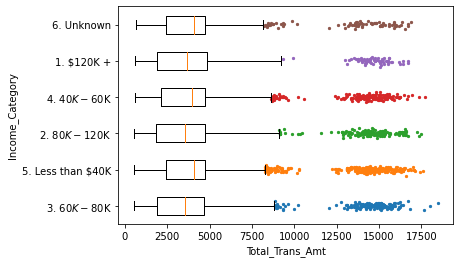

In [57]:
plot_box_jitter_outliers(df, 'Income_Category', 'Total_Trans_Amt')

## <font color='darkblue'>Summary</font>
In this article — we looked at different charts for visualizing data distribution. We highlighted and demonstrated the benefits of each of the chart types through an analysis on customer churn. I hope that the gists have been helpful. Please feel free to use/modify them for other purposes. I’m excited to see what kind of creative visualizations you will create.

## <font color='darkblue'>Suppplemt</font>
* [Seaborn - Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html)